In [2]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
data = pd.read_csv('data/stud.csv ')

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = data.drop(columns=['math_score'], axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:    ", end=" ")
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:    ", end=" ")
print(data['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:    ", end=" ")
print(data['parental_level_of_education'].unique())

print("Categories in 'test preparation course' variable:    ", end=" ")
print(data['test_preparation_course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [9]:
y = data['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
# Create columns Transfer with 3 types of transformers
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = StandardScaler()
oh_transfoermer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transfoermer, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features),
    ]
)


In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
# Separate dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
}

models_list = []
r2_list = []

# Iterate over name, model pairs to avoid overwriting the dict
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    models_list.append(name)

    print("Model Performance for training set")
    print(f"- Root Mean Error: {model_train_rmse:.4f}")
    print(f"- Mean Square Error: {model_train_mse:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print("------------------------------------------------------")

    print("Model Performance for testing set")
    print(f"- Root Mean Error: {model_test_rmse:.4f}")
    print(f"- Mean Square Error: {model_test_mse:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    print("=======================================================")
    print('='*35)
    print('\n')

Linear Regression
Model Performance for training set
- Root Mean Error: 5.3231
- Mean Square Error: 28.3349
- R2 Score: 0.8743
------------------------------------------------------
Model Performance for testing set
- Root Mean Error: 5.3940
- Mean Square Error: 29.0952
- R2 Score: 0.8804


Ridge
Model Performance for training set
- Root Mean Error: 5.3233
- Mean Square Error: 28.3378
- R2 Score: 0.8743
------------------------------------------------------
Model Performance for testing set
- Root Mean Error: 5.3904
- Mean Square Error: 29.0563
- R2 Score: 0.8806


Lasso
Model Performance for training set
- Root Mean Error: 6.5938
- Mean Square Error: 43.4784
- R2 Score: 0.8071
------------------------------------------------------
Model Performance for testing set
- Root Mean Error: 6.5197
- Mean Square Error: 42.5064
- R2 Score: 0.8253


KNeighbors Regressor
Model Performance for training set
- Root Mean Error: 5.7084
- Mean Square Error: 32.5856
- R2 Score: 0.8555
------------------

In [22]:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.851371
6,AdaBoost Regressor,0.843753
7,XGB Regressor,0.827797
2,Lasso,0.825320
3,KNeighbors Regressor,0.783497
4,Decision Tree Regressor,0.721417


In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


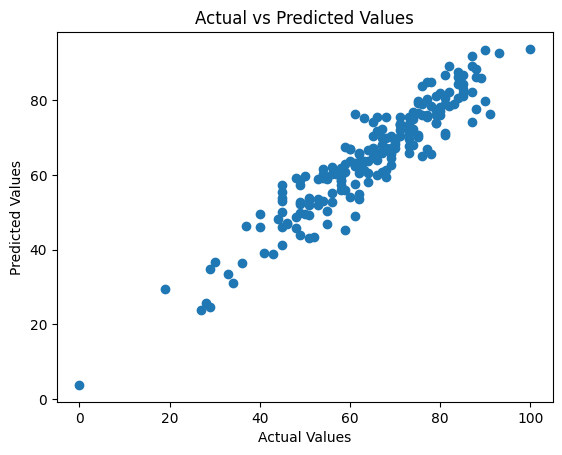

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

<Axes: xlabel='math_score'>

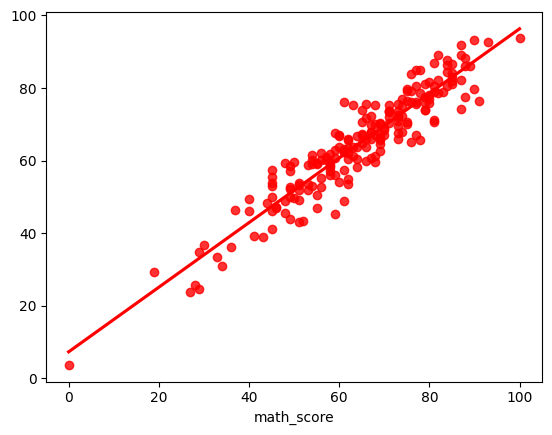

In [25]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='r')

In [26]:
pred_data = pd.DataFrame({'Actaul Values': y_test, 'Predicted Values': y_pred, 'Difference': y_test - y_pred})
pred_data

,Actaul Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
